<a href="https://colab.research.google.com/github/cnyakundi/financial_inclusion/blob/master/notebooks/Univariate_Analysis_Exploratory_Data_Analysis_Week_2_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis: Univariate Analysis

## 1. Defining the Question

### a) Specifying the Question

> The research problem is to figure out how I can predict which individuals are most likely to have or use a bank account.

### b) Defining the Metric for Success

> Our metrics of success is seeing people using our analysis to improve financial inclusion in Kenya Uganda and Tanzania

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [257]:
# Loading our Libraries 


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [258]:

# Loading the data from our CSV file 
df=pd.read_csv('Financial Dataset.csv')

## 3. Checking the Data

In [259]:
# Determining the no. of records in our dataset
df.count

<bound method DataFrame.count of       country  year  ...              Level of Educuation                Type of Job
0       Kenya  2018  ...              Secondary education              Self employed
1       Kenya  2018  ...              No formal education       Government Dependent
2       Kenya  2018  ...  Vocational/Specialised training              Self employed
3       Kenya  2018  ...                Primary education  Formally employed Private
4       Kenya  2018  ...                Primary education        Informally employed
...       ...   ...  ...                              ...                        ...
23519  Uganda  2018  ...              No formal education               Other Income
23520  Uganda  2018  ...              Secondary education               Other Income
23521  Uganda  2018  ...                Primary education               Other Income
23522  Uganda  2018  ...              Secondary education              Self employed
23523  Uganda  2018  ...        

In [260]:
# Previewing the top of our dataset
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [261]:
# Previewing the bottom of our dataset
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [280]:
#Describing the data 

df.describe

<bound method NDFrame.describe of       country  year  ...              Level of Educuation                Type of Job
0       Kenya  2018  ...              Secondary education              Self employed
1       Kenya  2018  ...              No formal education       Government Dependent
2       Kenya  2018  ...  Vocational/Specialised training              Self employed
3       Kenya  2018  ...                Primary education  Formally employed Private
4       Kenya  2018  ...                Primary education        Informally employed
...       ...   ...  ...                              ...                        ...
23519  Uganda  2018  ...              No formal education               Other Income
23520  Uganda  2018  ...              Secondary education               Other Income
23521  Uganda  2018  ...                Primary education               Other Income
23522  Uganda  2018  ...              Secondary education              Self employed
23523  Uganda  2018  ...       

In [262]:
# Checking whether each column has an appropriate datatype
#

## 4. External Data Source Validation

This data can be validated by checking the https://www.fsdt.or.tz/ website

### a.Validation

## 5. Tidying the Dataset

In [263]:
# Checking for Outliers


In [264]:
# Checking for Anomalies
# No Anomalies in our dataset 

In [265]:
# Identifying the Missing Data

df.isnull().values.any()

#This confirmes that we have missing data in our data. 

#Sum of Missing values - This sums the null values per column 

# We can also get the sum of missing values per column 

df.isnull().sum().sum()
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

##Checking our datatypes 

In [266]:
# This will display the datatypes per column 

df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

#Converting from objects to various datatypes that will help us to some analysis 

In [282]:
# We can convert Cell Phone Access and gender of respondents into categories. This will reduce memory usage 

df['Has a Bank account'].fillna('0')


# df['Cell Phone Access']=df['Cell Phone Access'].astype('category')


df['gender_of_respondent']=df['gender_of_respondent'].astype('category')



#We convert country, unique_id, the relationship with head, marital status, level of education and type of job into strings 

df['year']=pd.to_datetime(df['year']) # Convert date to datetime 
df['country']=df['country'].astype('str')
df['uniqueid']=df['uniqueid'].astype('str')
df['uniqueid']=df['uniqueid'].astype('str')
df['The relathip with head']=df['The relathip with head'].astype('str')
df['marital_status']=df['marital_status'].astype('str')
df['Level of Educuation']=df['Level of Educuation'].astype('str')
df['Type of Job']=df['Type of Job'].astype('str')





country                           object
year                      datetime64[ns]
uniqueid                          object
Has a Bank account                 int64
Type of Location                   int64
Cell Phone Access                  int64
household_size                   float64
Respondent Age                   float64
gender_of_respondent            category
The relathip with head            object
marital_status                    object
Level of Educuation               object
Type of Job                       object
dtype: object

## Convert some columns to Numerical in order to do more tests on them 

In [275]:


# Replace yes and No with '1' amd '0' then cast into integers 

df.replace(to_replace=['Yes','No'],value=['1','0'], inplace=True)


df['Has a Bank account'].fillna('0', inplace=True)


df['Has a Bank account']=df['Has a Bank account'].astype('int')
df.replace(to_replace=['Yes','No'],value=['1','0'], inplace=True)

# Replace yes and No with '1' amd '0' then cast into integers

df['Cell Phone Access'].fillna('0', inplace=True)

df['Cell Phone Access']=df['Cell Phone Access'].astype('int')

# Converting Type of location into integers 

df.replace(to_replace=['Rural','Urban'],value=['0','1'], inplace=True)
df['Type of Location'].fillna('0', inplace=True)

df['Type of Location']=df['Type of Location'].astype('int')

In [277]:
# Dealing with the Missing Data
# df['Respondent Age']=df['Respondent Age'].fillna(df['Respondent Age'].mode())


# df.isnull().sum()


#We fill all these with 0 because many people dont have bank accounts, live in rural areas and dont have cell phone access

df['Has a Bank account'].fillna('0', inplace=True)

df['Type of Location'].fillna('0', inplace=True)

df['Cell Phone Access'].fillna('0', inplace=True)



In [278]:
# More data cleaning procedures



## 6. Exploratory Analysis

In [302]:
#Calculating the mean, median, mode and standard deviation of respondent age 

df['Respondent Age'].mean()

38.804299702000854

In [303]:
#The mode of the respondent age 
df['Respondent Age'].mode()


0    30.0
dtype: float64

In [304]:
# The median of the respondents age 

df['Respondent Age'].median()

35.0

In [305]:
#The standard deviation 

df['Respondent Age'].std()

16.51999610879876

In [307]:
#The Range 


min=df['Respondent Age'].min()

max=df['Respondent Age'].max()

range =max-min

range



84.0

In [309]:
#Interquartile range 

Q1 = df['Respondent Age'].quantile(0.25)
Q3 = df['Respondent Age'].quantile(0.75)
IQR = Q3 - Q1

IQR

23.0

In [314]:
#Calculating the variance 

df.var()

Has a Bank account      0.120883
Type of Location        0.237879
Cell Phone Access       0.191564
household_size          5.198096
Respondent Age        272.910271
dtype: float64

In [315]:
# Calculating the Standard Deviation 

df.std()

Has a Bank account     0.347683
Type of Location       0.487728
Cell Phone Access      0.437680
household_size         2.279933
Respondent Age        16.519996
dtype: float64

In [316]:
# Calculating the curtosis 

df.kurt()

Has a Bank account    2.273525
Type of Location     -1.796124
Cell Phone Access    -0.779490
household_size        1.158154
Respondent Age        0.101108
dtype: float64

In [317]:
# Calculating the skewness 

df.skew()

Has a Bank account    2.067204
Type of Location      0.451695
Cell Phone Access    -1.104797
household_size        0.977652
Respondent Age        0.841801
dtype: float64

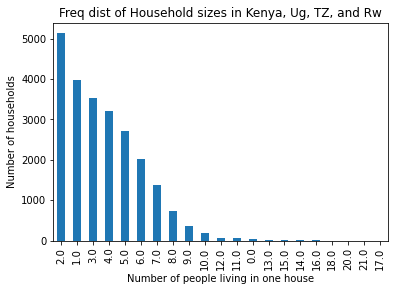

<Figure size 2160x864 with 0 Axes>

In [293]:
# Ploting the univariate summaries and recording our observations



df['household_size'].value_counts().plot.bar(title='Freq dist of Household sizes in Kenya, Ug, TZ, and Rw')

plt.xlabel('Number of people living in one house')
plt.ylabel('Number of households')
plt.figure(figsize=(30, 12))
plt.show()

#It shows that in all countries, many households have two people living in a household  and the least have 12 people living in one house


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

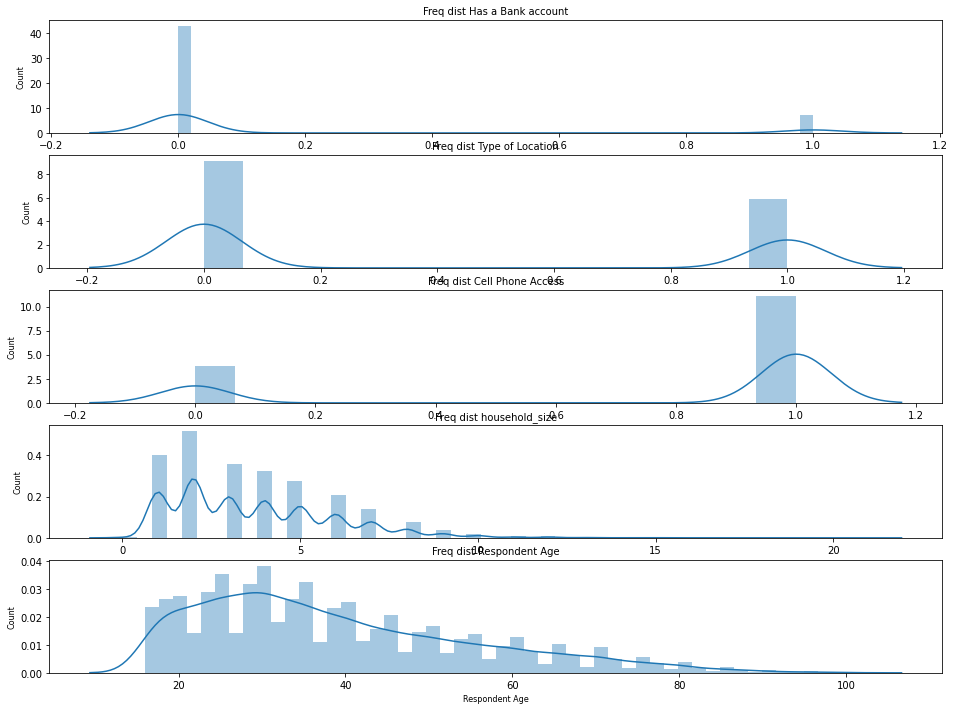

In [301]:
 # Below is the code to plot the univariate distribution of the numerical columns which contains the histograms 
 # and the estimated PDF. We use displot of the seaborn library to plot this graph:

col_names = ['Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age']

fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

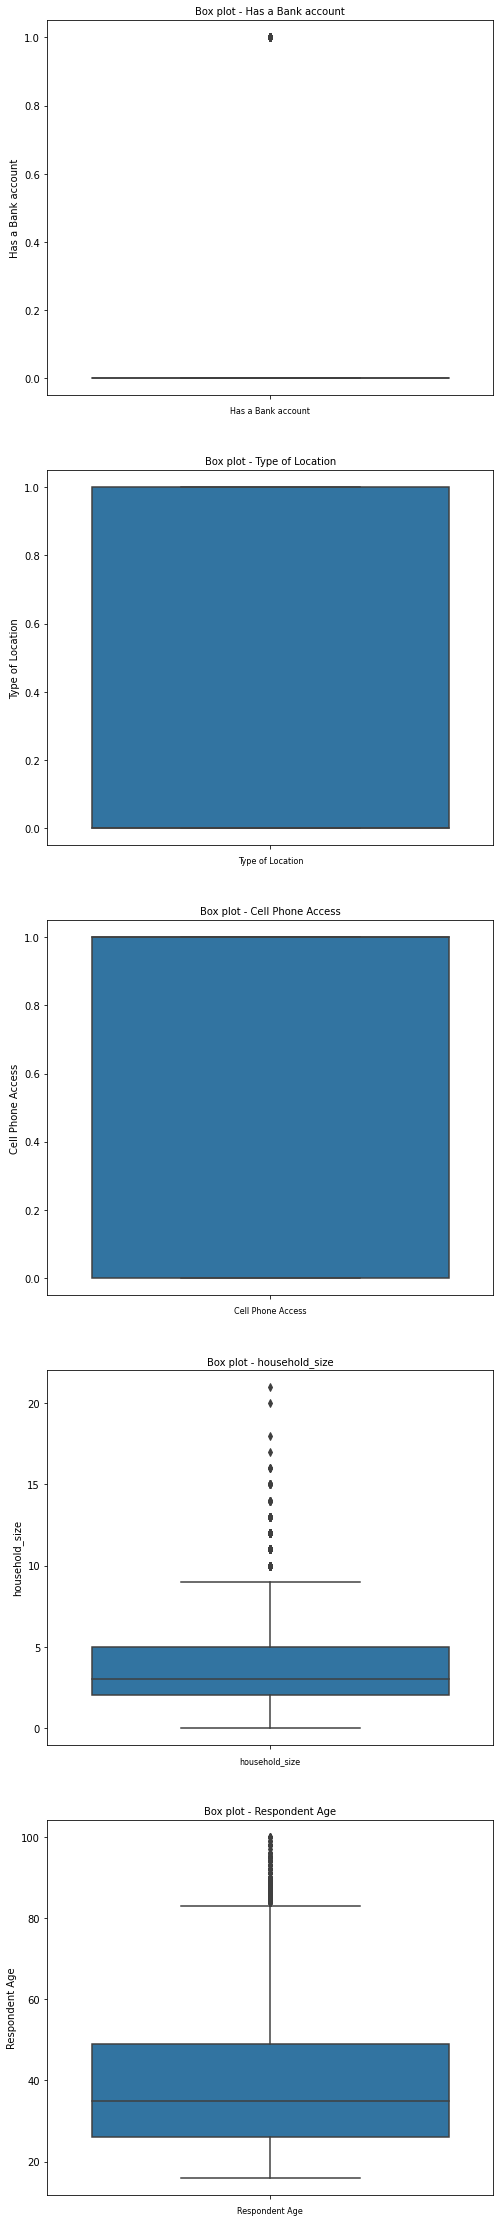

In [312]:
col_names = ['Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()


#Many households lie between 1 and then and the rest are outliers. In fact many househols lie between the 75 and 25th percentile 

# Respondents age above 84 are outliers and respondents age is negatively skewed. 

#Celphone access and type of location display uniform distribution 

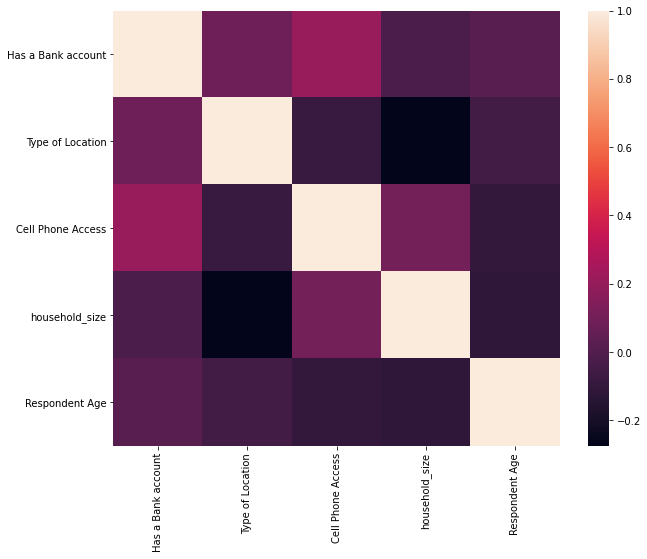

In [313]:
f, x = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


#Above you can see the correlation network of all the variables selected, 
#correlation value lies between -1 to +1. Highly correlated variables 
#will have correlation value close to +1 and less correlated variables will have correlation value close to -1.

## 7. Implementing the Solution

In [310]:
# Implementing the Solution


## 8. Challenging the solution

In [311]:
# Reviewing the Solution 
The results are in the data 

## 9. Follow up questions

### a). Did we have the right data?

Yes 